## ANÁLISIS DE INFORMACIÓN DE CALIDAD DE AIRE DEL SENAMHI
##### CURSO: ANÁLISIS DE DATOSAMBIENTALES CON PYTHON I

##### AUTOR: https://github.com/marvinjonathcn 

- #### NOTA: El siguiente código fue desarrollado en python 3.8.5. Antes de ejecutar los scripts se deben instalar las librerías necesarias. 

### 1. INSTALACIÓN E IMPORTACIÓN DE LAS LIBRERÍAS

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import pandas_profiling
import missingno as msno

import requests
import re
from sklearn import preprocessing
import statsmodels.formula.api as sfm
import os


### 2. IMPORTACIÓN DE LAS BASES DE DATOS

In [4]:
# HACER UNA SOLICITUD PARA OBTENER LA INFORMACIÓN DE UNA PAGINA WEB EN HTTP

r = requests.get("https://www.senamhi.gob.pe/site/sea/www/site/sea/graficas/dato_hora.php?estacion=112194&cont=N_PM25&f1=24/03/2014&f2=03/04/2021")
print(r.text)


<!DOCTYPE HTML>
<html>
	<head>
		<meta http-equiv="Content-Type" content="text/html; charset=utf-8">
		<title>SENAMHI - SEA</title>

		<style type="text/css">

		</style>
	</head>
	<body>
<script src="code/highcharts.js"></script>
<script src="code/modules/exporting.js"></script>

<div id="container" style="min-width: 310px; height: 580px; margin: 0 auto"></div>

<script type="text/javascript">

    Highcharts.chart('container', {
        chart: {
            type: 'line'
        },
        title: {
            text: 'ESTACI\u00D3N: CAMPO DE MARTE (CDM) - Lima Centro'
        },
        subtitle: {
            text: ''
        },
        xAxis: {
            categories: ['04/04/201414:00:','04/04/201415:00:','04/04/201416:00:','04/04/201417:00:','04/04/201418:00:','04/04/201419:00:','04/04/201420:00:','04/04/201421:00:','04/04/201422:00:','04/04/201423:00:','05/04/201400:00:','05/04/201401:00:','05/04/201402:00:','05/04/201403:00:','05/04/201404:00:','05/04/201405:00:','05/04/201406:0

In [5]:
# REALIZAR CORTES AL TEXTO DEPENDIENDO LA UBICACION DE CIERTAS PALABRAS O FRASES

s = r.text

s_split1 = s.split('radius: 0,')[2]

s_split2 = s_split1.split('[')[1]

s_split3 = s_split2.split(',]')[0] 

s_split3


'null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null

In [6]:
# REALIZAR CORTES AL TEXTO DEPENDIENDO LA UBICACION DE CIERTAS PALABRAS O FRASES

s2 = r.text

s2_split1 = s2.split('xAxis: {')[1]

s2_split2 = s2_split1.split('[')[1]

s2_split3 = s2_split2.split(',]')[0] 

s2_split3


"'04/04/201414:00:','04/04/201415:00:','04/04/201416:00:','04/04/201417:00:','04/04/201418:00:','04/04/201419:00:','04/04/201420:00:','04/04/201421:00:','04/04/201422:00:','04/04/201423:00:','05/04/201400:00:','05/04/201401:00:','05/04/201402:00:','05/04/201403:00:','05/04/201404:00:','05/04/201405:00:','05/04/201406:00:','05/04/201407:00:','05/04/201408:00:','05/04/201409:00:','05/04/201410:00:','05/04/201411:00:','05/04/201412:00:','05/04/201413:00:','05/04/201414:00:','05/04/201415:00:','05/04/201416:00:','05/04/201417:00:','05/04/201418:00:','05/04/201419:00:','05/04/201420:00:','05/04/201421:00:','05/04/201422:00:','05/04/201423:00:','06/04/201400:00:','06/04/201401:00:','06/04/201402:00:','06/04/201403:00:','06/04/201404:00:','06/04/201405:00:','06/04/201406:00:','06/04/201407:00:','06/04/201408:00:','06/04/201409:00:','06/04/201410:00:','06/04/201411:00:','06/04/201412:00:','06/04/201413:00:','06/04/201414:00:','06/04/201415:00:','06/04/201416:00:','06/04/201417:00:','06/04/2014

### 3. CONVERSIÓN DE FORMATOS Y MANIPULACIÓN DEL DATAFRAME

In [7]:
# REALIZAR LA SEPARACIÓN DE LOS ARCHIVOS JSON POR UNA COMA PM 2.5

values = [str(i) for i in s_split3.split(',')]

df1 = pd.DataFrame(values, columns=['PM2.5'])

df1

PM2.5
0      null
1      null
2      null
3      null
4      null
...     ...
47920  12.1
47921  13.8
47922  14.3
47923  15.7
47924  16.9

[47925 rows x 1 columns]

In [8]:
# REALIZAR LA SEPARACIÓN DE LOS ARCHIVOS JSON POR UNA COMA FECHAS

values2 = [str(i) for i in s2_split3.split(',')]
values2 = [i[1:-2] for i in values2]

df2 = pd.DataFrame(values2, columns=['Date'])
df2

Date
0      04/04/201414:00
1      04/04/201415:00
2      04/04/201416:00
3      04/04/201417:00
4      04/04/201418:00
...                ...
47920  03/04/202119:00
47921  03/04/202120:00
47922  03/04/202121:00
47923  03/04/202122:00
47924  03/04/202123:00

[47925 rows x 1 columns]

In [9]:
# REEMPLAZAR LOS VALORES NULL POR NP.NAN PARA QUE SEA RECONOCIDO COMO MISSING

df = pd.concat([df1, df2], axis=1)

df

PM2.5             Date
0      null  04/04/201414:00
1      null  04/04/201415:00
2      null  04/04/201416:00
3      null  04/04/201417:00
4      null  04/04/201418:00
...     ...              ...
47920  12.1  03/04/202119:00
47921  13.8  03/04/202120:00
47922  14.3  03/04/202121:00
47923  15.7  03/04/202122:00
47924  16.9  03/04/202123:00

[47925 rows x 2 columns]

In [10]:
df.dtypes

PM2.5    object
Date     object
dtype: object

In [10]:
# CAMBIAR EL FORMATO DE CONCETRACION DE PM2.5 A 

df = df.replace('null', np.nan, regex=True)

df['PM2.5'] = df['PM2.5'].astype(float)

df['Date'] = pd.to_datetime(df['Date'].astype(str), format='%d/%m/%Y%H:%M')

df = df.set_index('Date')

df

PM2.5
Date                      
2014-04-04 14:00:00    NaN
2014-04-04 15:00:00    NaN
2014-04-04 16:00:00    NaN
2014-04-04 17:00:00    NaN
2014-04-04 18:00:00    NaN
...                    ...
2021-04-03 19:00:00   12.1
2021-04-03 20:00:00   13.8
2021-04-03 21:00:00   14.3
2021-04-03 22:00:00   15.7
2021-04-03 23:00:00   16.9

[47925 rows x 1 columns]

In [11]:
df.dtypes

PM2.5    float64
dtype: object

In [13]:
# IMPORTAR BASE DA DATOS HIDROMETEOROLOGICA

df_hm = pd.read_csv(r'C:\Users\Asus\Documents\campo-de-marte-datahm.csv', index_col = 0)
df_hm

TEMPERATURA (°C)  PRECIPITACIÓN (mm/hora)  HUMEDAD (%)  \
Date                                                                          
2016-05-01 00:00:00              19.9                      0.0         81.0   
2016-05-01 01:00:00              19.4                      0.0         83.0   
2016-05-01 02:00:00              18.8                      0.0         85.0   
2016-05-01 03:00:00              18.6                      0.0         88.0   
2016-05-01 04:00:00              18.6                      0.0         88.0   
...                               ...                      ...          ...   
2021-03-31 19:00:00              20.2                      0.0         81.0   
2021-03-31 20:00:00              20.4                      0.0         81.0   
2021-03-31 21:00:00              20.1                      0.0         82.0   
2021-03-31 22:00:00              19.9                      0.0         84.0   
2021-03-31 23:00:00              19.6                      0.0         84.0   

                     DIRECCION DEL VIENTO (°)  VELOCIDAD DEL VIENTO (m/s)  
Date                                                                       
2016-05-01 00:00:00                     271.0                         1.1  
2016-05-01 01:00:00                      12.0                         0.1  
2016-05-01 02:00:00                     245.0                         0.0  
2016-05-01 03:00:00                      59.0                         0.2  
2016-05-01 04:00:00                     317.0                         0.0  
...                                       ...                         ...  
2021-03-31 19:00:00                     217.0                         2.6  
2021-03-31 20:00:00                     207.0                         2.1  
2021-03-31 21:00:00                     214.0                         2.0  
2021-03-31 22:00:00                     208.0                         2.6  
2021-03-31 23:00:00                     214.0                         1.9  

[42683 rows x 5 columns]

In [14]:
# NUMERO DE MISSING POR COLUMNA

df_hm.isnull().sum()

TEMPERATURA (°C)              35
PRECIPITACIÓN (mm/hora)       58
HUMEDAD (%)                   37
DIRECCION DEL VIENTO (°)      52
VELOCIDAD DEL VIENTO (m/s)    49
dtype: int64

In [16]:
# CONCATENAR AMBOS DATAFRAMES USANDO LA COLUMNA FECHA COMO REFERENCIA

df['Date1']=df.index.astype(str)
df_hm['Date1']=df_hm.index.astype(str)

df_final = df.merge(df_hm, on="Date1", how = 'inner')
df_final = df_final.set_index('Date1')
df_final.index.name = 'Date'

df_final

PM2.5  TEMPERATURA (°C)  PRECIPITACIÓN (mm/hora)  \
Date                                                                    
2016-05-01 00:00:00    8.6              19.9                      0.0   
2016-05-01 01:00:00   15.6              19.4                      0.0   
2016-05-01 02:00:00   16.9              18.8                      0.0   
2016-05-01 03:00:00   23.1              18.6                      0.0   
2016-05-01 04:00:00   33.5              18.6                      0.0   
...                    ...               ...                      ...   
2021-03-31 19:00:00   14.5              20.2                      0.0   
2021-03-31 20:00:00   15.3              20.4                      0.0   
2021-03-31 21:00:00   17.1              20.1                      0.0   
2021-03-31 22:00:00   16.8              19.9                      0.0   
2021-03-31 23:00:00   14.3              19.6                      0.0   

                     HUMEDAD (%)  DIRECCION DEL VIENTO (°)  \
Date                                                         
2016-05-01 00:00:00         81.0                     271.0   
2016-05-01 01:00:00         83.0                      12.0   
2016-05-01 02:00:00         85.0                     245.0   
2016-05-01 03:00:00         88.0                      59.0   
2016-05-01 04:00:00         88.0                     317.0   
...                          ...                       ...   
2021-03-31 19:00:00         81.0                     217.0   
2021-03-31 20:00:00         81.0                     207.0   
2021-03-31 21:00:00         82.0                     214.0   
2021-03-31 22:00:00         84.0                     208.0   
2021-03-31 23:00:00         84.0                     214.0   

                     VELOCIDAD DEL VIENTO (m/s)  
Date                                             
2016-05-01 00:00:00                         1.1  
2016-05-01 01:00:00                         0.1  
2016-05-01 02:00:00                         0.0  
2016-05-01 03:00:00                         0.2  
2016-05-01 04:00:00                         0.0  
...                                         ...  
2021-03-31 19:00:00                         2.6  
2021-03-31 20:00:00                         2.1  
2021-03-31 21:00:00                         2.0  
2021-03-31 22:00:00                         2.6  
2021-03-31 23:00:00                         1.9  

[37502 rows x 6 columns]

In [16]:
# NUMERO DE MISSING POR COLUMNA

df_final.isnull().sum()

PM2.5                         1251
TEMPERATURA (°C)                34
PRECIPITACIÓN (mm/hora)         53
HUMEDAD (%)                     35
DIRECCION DEL VIENTO (°)        48
VELOCIDAD DEL VIENTO (m/s)      45
dtype: int64

In [18]:
df_final.dtypes

PM2.5                         float64
TEMPERATURA (°C)              float64
PRECIPITACIÓN (mm/hora)       float64
HUMEDAD (%)                   float64
DIRECCION DEL VIENTO (°)      float64
VELOCIDAD DEL VIENTO (m/s)    float64
dtype: object

In [17]:
# EJECUTAMOS UN REPORTE PREVIO DE NUESTRA BASE DE DATOS (PROFILING REPORT)

df_final.profile_report()

In [19]:
# EVALUAR LOS TIPOS DE VARIABLES

df_final.dtypes

PM2.5                         float64
TEMPERATURA (°C)              float64
PRECIPITACIÓN (mm/hora)       float64
HUMEDAD (%)                   float64
DIRECCION DEL VIENTO (°)      float64
VELOCIDAD DEL VIENTO (m/s)    float64
dtype: object

In [20]:
# ELIMINAMOS LOS VALORES FALTANTES EN NUESTRO DATAFRAME

df_final.dropna(inplace=True)

df_final.isnull().sum()

PM2.5                         0
TEMPERATURA (°C)              0
PRECIPITACIÓN (mm/hora)       0
HUMEDAD (%)                   0
DIRECCION DEL VIENTO (°)      0
VELOCIDAD DEL VIENTO (m/s)    0
dtype: int64

<AxesSubplot:>

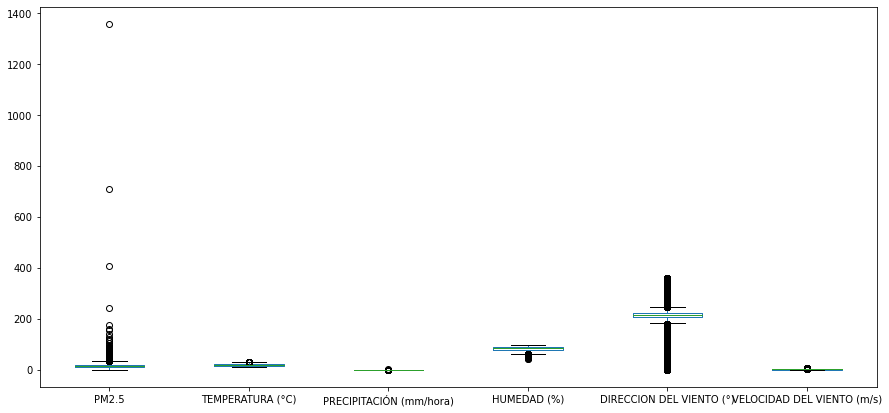

In [21]:
# BOXPLOT PARA NUESTROS DATOS

df_final.plot.box(figsize=(15,7))

In [22]:
# OBTENER EL RANGO INTERCUARTIL (IQR)

Q1 = df_final.quantile(0.25)
Q3 = df_final.quantile(0.75)
IQR = Q3 - Q1

IQR

PM2.5                         10.1
TEMPERATURA (°C)               5.4
PRECIPITACIÓN (mm/hora)        0.0
HUMEDAD (%)                   11.0
DIRECCION DEL VIENTO (°)      16.0
VELOCIDAD DEL VIENTO (m/s)     1.7
dtype: float64

### Eliminamos los valores outliers usando la metodología de la puntuación Z, ello debido a que podemos eliminar outliers de manera multivariable y no solo usando una variable.

In [23]:
# ELIMINAR OUTLIERS USANDO LA PUNTUACION Z (VARIAS VARIABLES)

from scipy import stats

data = df_final[(np.abs(stats.zscore(df_final.select_dtypes('float64'))) < 3).all(axis=1)]

data

PM2.5  TEMPERATURA (°C)  PRECIPITACIÓN (mm/hora)  \
Date                                                                    
2016-05-01 00:00:00    8.6              19.9                      0.0   
2016-05-01 02:00:00   16.9              18.8                      0.0   
2016-05-01 04:00:00   33.5              18.6                      0.0   
2016-05-01 05:00:00   39.7              19.2                      0.0   
2016-05-01 06:00:00   43.2              18.9                      0.0   
...                    ...               ...                      ...   
2021-03-31 19:00:00   14.5              20.2                      0.0   
2021-03-31 20:00:00   15.3              20.4                      0.0   
2021-03-31 21:00:00   17.1              20.1                      0.0   
2021-03-31 22:00:00   16.8              19.9                      0.0   
2021-03-31 23:00:00   14.3              19.6                      0.0   

                     HUMEDAD (%)  DIRECCION DEL VIENTO (°)  \
Date                                                         
2016-05-01 00:00:00         81.0                     271.0   
2016-05-01 02:00:00         85.0                     245.0   
2016-05-01 04:00:00         88.0                     317.0   
2016-05-01 05:00:00         86.0                     197.0   
2016-05-01 06:00:00         85.0                     134.0   
...                          ...                       ...   
2021-03-31 19:00:00         81.0                     217.0   
2021-03-31 20:00:00         81.0                     207.0   
2021-03-31 21:00:00         82.0                     214.0   
2021-03-31 22:00:00         84.0                     208.0   
2021-03-31 23:00:00         84.0                     214.0   

                     VELOCIDAD DEL VIENTO (m/s)  
Date                                             
2016-05-01 00:00:00                         1.1  
2016-05-01 02:00:00                         0.0  
2016-05-01 04:00:00                         0.0  
2016-05-01 05:00:00                         1.3  
2016-05-01 06:00:00                         0.0  
...                                         ...  
2021-03-31 19:00:00                         2.6  
2021-03-31 20:00:00                         2.1  
2021-03-31 21:00:00                         2.0  
2021-03-31 22:00:00                         2.6  
2021-03-31 23:00:00                         1.9  

[34216 rows x 6 columns]

In [24]:
data.profile_report()

### Normalizaremos nuestros datos numéricos antes de ingresarlos al modelo para poder convertirlos a una misma escala, de esta manera evitaremos una mayor influencia de las variables que presentan mayor escala numérica a comparación de otras con menor escala. Además, convertiremos nuestras variables categóricas en  usando la metodología de variables dummy antes de ejecutar el modelo

In [25]:
# NORMALIZAMOS NUESTRAS DATOS NUMÉRICOS USANDO LA METODOLOGIA MIN-MAX

data_model = data

num_cols = data_model.columns[data_model.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
min_max_scaler = preprocessing.MinMaxScaler()
data_model[num_cols] = min_max_scaler.fit_transform(data_model[num_cols])
data_model.columns = ['PM2p5', 'T', 'PP', 'HUM', 'DV', 'VV']
data_model.head(10)


C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Asus\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\Asus\Anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

PM2p5         T   PP       HUM        DV        VV
Date                                                                      
2016-05-01 00:00:00  0.153571  0.403614  0.0  0.585366  0.772277  0.186441
2016-05-01 02:00:00  0.301786  0.337349  0.0  0.682927  0.643564  0.000000
2016-05-01 04:00:00  0.598214  0.325301  0.0  0.756098  1.000000  0.000000
2016-05-01 05:00:00  0.708929  0.361446  0.0  0.707317  0.405941  0.220339
2016-05-01 06:00:00  0.771429  0.343373  0.0  0.682927  0.094059  0.000000
2016-05-01 09:00:00  0.398214  0.662651  0.0  0.243902  0.480198  0.508475
2016-05-01 10:00:00  0.517857  0.656627  0.0  0.243902  0.504950  0.542373
2016-05-01 11:00:00  0.432143  0.734940  0.0  0.121951  0.519802  0.644068
2016-05-01 12:00:00  0.300000  0.783133  0.0  0.097561  0.400990  0.661017
2016-05-01 13:00:00  0.271429  0.704819  0.0  0.121951  0.564356  0.644068

In [26]:
# IMPLEMENTACION DE UN MODELO DE REGRESION LINEAL MULTIPLE

lm = sfm.ols(formula="PM2p5 ~ T+HUM+DV+VV", data=data_model).fit() 

lm.params

Intercept    0.444991
T           -0.296260
HUM         -0.093662
DV           0.068259
VV          -0.044827
dtype: float64

In [27]:
data_model.dtypes

PM2p5    float64
T        float64
PP       float64
HUM      float64
DV       float64
VV       float64
dtype: object

In [28]:
lm.pvalues

Intercept    0.000000e+00
T            0.000000e+00
HUM          1.597706e-46
DV           9.918809e-15
VV           7.552993e-20
dtype: float64

In [29]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PM2p5   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     994.1
Date:                Sun, 30 May 2021   Prob (F-statistic):               0.00
Time:                        18:30:15   Log-Likelihood:                 15882.
No. Observations:               34216   AIC:                        -3.175e+04
Df Residuals:                   34211   BIC:                        -3.171e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4450      0.009     50.573      0.000       0.428       0.462
T             -0.2963      0.006    -49.440      0.000      -0.308      -0.285
HUM           -0.0937      0.007    -14.343      0.000      -0.106      -0.081
DV             0.0683      0.009      7.744      0.000       0.051       0.086
VV            -0.0448      0.005     -9.125      0.000      -0.054      -0.035
==============================================================================
Omnibus:                     6455.654   Durbin-Watson:                   0.322
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13385.151
Skew:                           1.122   Prob(JB):                         0.00
Kurtosis:                       5.087   Cond. No.                         21.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


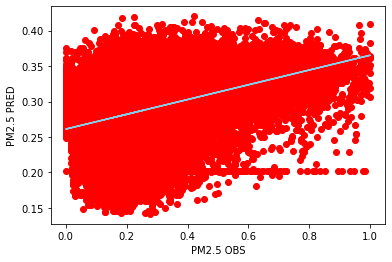

In [30]:
PM_predict = lm.predict(data_model[["T","HUM","DV","VV"]])
data_model["PM2p5_predict"] = PM_predict

x = data_model["PM2p5"] 
y = data_model["PM2p5_predict"] 

#Calculando los coeficientes del ajuste de regresión:
a, b = np.polyfit(x, y, 1) # 1 es el grado del polinomio
r = np.corrcoef(x, y) # r = coeficiente de correlación

plt.subplot(111)
plt.scatter(x,y, color="r")
plt.xlabel("PM2.5 OBS")
plt.ylabel("PM2.5 PRED")
plt.plot(x, a * x + b, color="skyblue")


plt.show()